# Internship Project 2

## Importing all the important libraries

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import tkinter as tk
from tkinter import messagebox

## Going through the data

In [4]:
data = pd.read_csv('diabetes.csv')

In [5]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


## Performing EDA

In [6]:
data.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Correlation analysis

In [8]:
corr = data.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


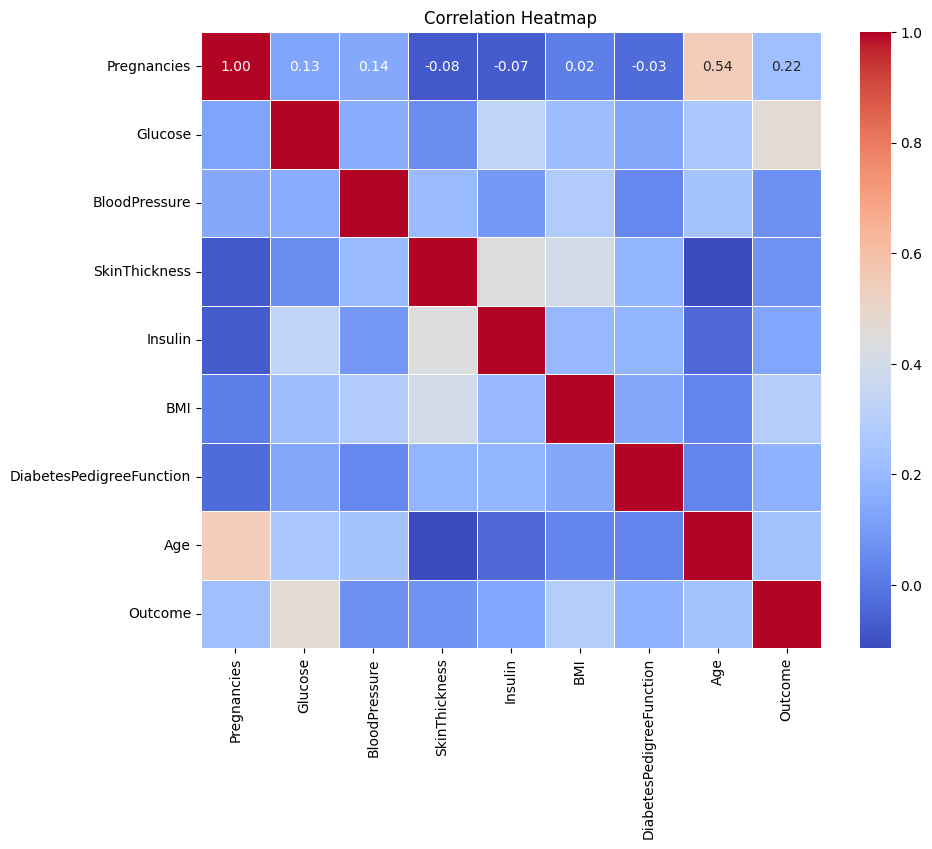

In [9]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

## Creating and training a model

In [10]:
x = data.drop("Outcome", axis = 1)
y=  data['Outcome']
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [11]:
# Initialize the logistic regression model
model = LogisticRegression(max_iter=200)

# Fit the model on the training data
model.fit(x_train, y_train)


LogisticRegression(max_iter=200)

## Testing 

In [12]:
prediction = model.predict(x_test)

In [13]:
prediction

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

## Accuracy 

In [14]:
accuracy = accuracy_score(prediction, y_test)


In [15]:
accuracy

0.7597402597402597

## Creating an interface to show the prediction with user input

In [1]:
def predict_diabetes():
    try:
        pregnancies = int(entry_pregnancies.get())
        glucose = float(entry_glucose.get())
        
        blood_pressure = float(entry_blood_pressure.get())
        skin_thickness = float(entry_skin_thickness.get())
        
        insulin = float(entry_insulin.get())
        bmi = float(entry_bmi.get())
        diabetes_pedigree_function = float(entry_diabetes_pedigree_function.get())
        age = int(entry_age.get())

        new_data = pd.DataFrame({
            'Pregnancies': [pregnancies],
            'Glucose': [glucose],
            'BloodPressure': [blood_pressure],
            'SkinThickness': [skin_thickness],
            'Insulin': [insulin],
            'BMI': [bmi],
            'DiabetesPedigreeFunction': [diabetes_pedigree_function],
            'Age': [age]
        })

        new_prediction = model.predict(new_data)
        prediction_text = "The Patient has Diabtetes" if new_prediction[0] == 1 else "No diabetes"
        messagebox.showinfo("Prediction", f"Diabetes Prediction: {prediction_text}")
        
    except ValueError:
        
        messagebox.showerror("Input error", "Please enter valid data")
        
    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {e}")



In [2]:
def create_gui():
    root = tk.Tk()
    root.title("Diabetes Predictor")

    tk.Label(root, text="Pregnancies").grid(row=0)
    tk.Label(root, text="Glucose").grid(row=1)
    tk.Label(root, text="BloodPressure").grid(row=2)
    
    tk.Label(root, text="SkinThickness").grid(row=3)
    tk.Label(root, text="Insulin").grid(row=4)
    
    tk.Label(root, text="BMI").grid(row=5)
    tk.Label(root, text="DiabetesPedigreeFunction").grid(row=6)
    tk.Label(root, text="Age").grid(row=7)

    global entry_pregnancies, entry_glucose, entry_blood_pressure, entry_skin_thickness
    global entry_insulin, entry_bmi, entry_diabetes_pedigree_function, entry_age

    entry_pregnancies = tk.Entry(root)
    entry_glucose = tk.Entry(root)
    
    entry_blood_pressure = tk.Entry(root)
    entry_skin_thickness = tk.Entry(root)
    entry_insulin = tk.Entry(root)
    
    entry_bmi = tk.Entry(root)
    entry_diabetes_pedigree_function = tk.Entry(root)
    
    entry_age = tk.Entry(root)

    entry_pregnancies.grid(row=0, column=1)
    
    entry_glucose.grid(row=1, column=1)
    entry_blood_pressure.grid(row=2, column=1)
    
    entry_skin_thickness.grid(row=3, column=1)
    entry_insulin.grid(row=4, column=1)
    entry_bmi.grid(row=5, column=1)
    
    entry_diabetes_pedigree_function.grid(row=6, column=1)
    entry_age.grid(row=7, column=1)

    predict_button = tk.Button(root, text="Predict", command=predict_diabetes)
    
    predict_button.grid(row=8, columnspan=2)

    root.mainloop()

create_gui()

NameError: name 'tk' is not defined